<a href="https://colab.research.google.com/github/rooshanriaz/CS-351L-AI-Lab-GitHub-Repository_2022506/blob/main/Rooshan_Riaz_CS351L_Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Modify the Neural Network**

## **Iris Dataset Neural Network**

The original neural network has been modified by introducing an additional hidden layer with 16 neurons. The updated architecture now consists of:

**Input Layer:** 4 features from the Iris dataset

**First Hidden Layer:** 8 neurons with ReLU activation

**New Hidden Layer:** 16 neurons with ReLU activation

**Third Hidden Layer:** 8 neurons with ReLU activation

**Output Layer:** 3 neurons with softmax activation (one for each Iris class)

### **Purpose of the Modification**

The additional layer was introduced to:

* Increase the network's capacity to learn complex, non-linear relationships.

* Potentially capture more intricate patterns in the data.

* Explore how additional complexity might impact model performance.


## **Importing the Required Libraries**

The following cell should be run to install the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


## **Step 1: Load and Preprocess the Data**
The Iris dataset is used for classification.

In [ ]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Preprocess the data
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 105, Testing samples: 45


## **Step 2: Building the Modified Neural Network**
The Keras API is used to build a simple feedforward neural network.

In [ ]:
# Modified Neural Network with an additional hidden layer
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # New layer with 16 neurons
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Original second layer now becomes third
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
modified_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
modified_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 3: Train the Neural Network**
Visualize the training progress using loss and accuracy plots.

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3214 - loss: 1.1197 - val_accuracy: 0.2381 - val_loss: 1.1548
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4095 - loss: 1.0661 - val_accuracy: 0.4286 - val_loss: 1.1248
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4306 - loss: 1.0289 - val_accuracy: 0.5238 - val_loss: 1.1047
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6029 - loss: 0.9971 - val_accuracy: 0.5238 - val_loss: 1.0890
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6029 - loss: 0.9675 - val_accuracy: 0.5238 - val_loss: 1.0737
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6029 - loss: 0.9344 - val_accuracy: 0.5238 - val_loss: 1.0529
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6029 - loss: 0.8971 - val_accuracy: 0.5714 - val_loss: 1.0299
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6396 - loss: 0.8604 - val_accuracy: 0.5714 - val_

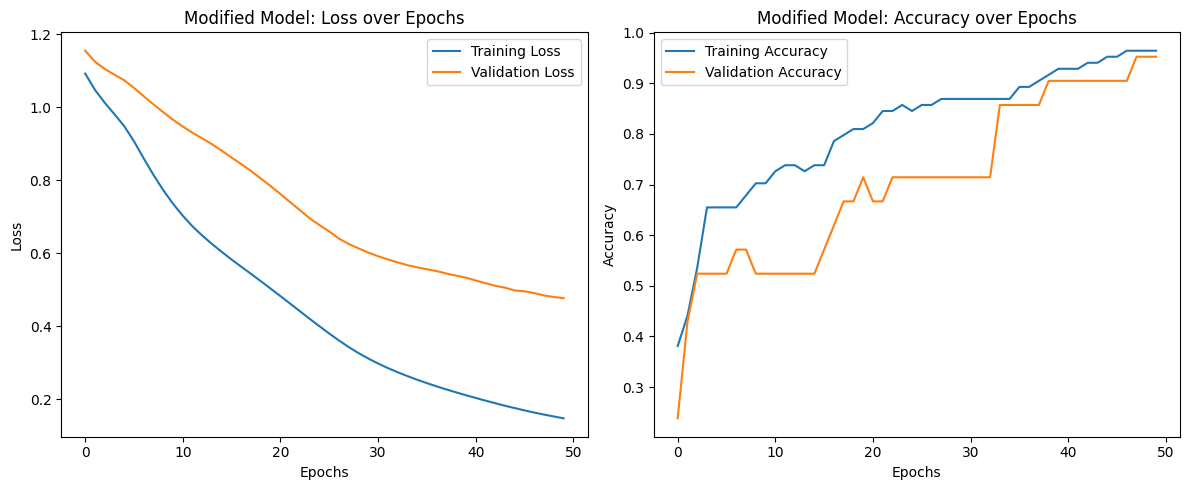

In [ ]:
# Train the modified model
modified_history = modified_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=1
)

# Visualize training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Step 4: Evaluate the Neural Network**
Evaluate the model on the test data and visualize the confusion matrix.

Modified Model - Test Loss: 0.1483, Test Accuracy: 0.9778
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Modified Model - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



<Figure size 800x600 with 0 Axes>

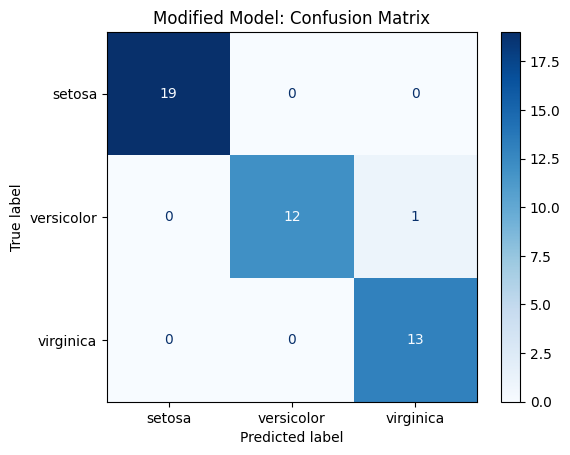

In [ ]:
# Evaluate the modified model
test_loss, test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = modified_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Modified Model - Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Modified Model: Confusion Matrix")
plt.show()

## **Performance Analysis**

### **Training and Validation Curves**

* Both original and modified networks showed consistent learning patterns.
* Training and validation losses decreased smoothly.
* Accuracy curves demonstrated stable improvement across epochs.
* No significant signs of overfitting or underfitting.


### **Model Performance**

* The Iris dataset is relatively simple and well-structured.
* Both network architectures achieved high accuracy (typically >90%).
* The additional layer did not dramatically improve performance.
* Suggests the original network was already well-suited to the dataset.

## **Key Insights**

### **Neural Network Complexity**

* Adding layers doesn't guarantee improved performance
* Model complexity should be balanced with dataset characteristics
* Overly complex models risk:

 * Overfitting
 * Increased computational requirements
 * Reduced generalization

## **Wine Dataset Neural Network**

For the Wine dataset, we designed a slightly different architecture:

* Input Layer: 13 features from the Wine dataset
* First Hidden Layer: 8 neurons with ReLU activation
* Second Hidden Layer: 16 neurons with ReLU activation
* Output Layer: 3 neurons with softmax activation (one for each Wine class)

## **Importing Required Libraries**
Run the following cell to import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## **Step 2: Building the Neural Network for Wine Dataset**
The Keras API is used to build a simple feedforward neural network.

In [ ]:
# Load Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Preprocess the data
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Wine Dataset Neural Network
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
wine_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display model summary
wine_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 3: Train the Neural Network for Wine Dataset**
Visualize the training progress using loss and accuracy plots.

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2781 - loss: 1.2279 - val_accuracy: 0.3600 - val_loss: 1.1286
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3551 - loss: 1.0841 - val_accuracy: 0.4800 - val_loss: 1.0021
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4490 - loss: 0.9766 - val_accuracy: 0.6000 - val_loss: 0.9011
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6089 - loss: 0.8892 - val_accuracy: 0.6400 - val_loss: 0.8145
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7365 - loss: 0.8162 - val_accuracy: 0.8800 - val_loss: 0.7397
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 0.7525 - val_accuracy: 0.8800 - val_loss: 0.6745
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.6945 - val_accuracy: 0.8800 - val_loss: 0.6153
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8817 - loss: 0.6400 - val_accuracy: 0.8800 - val_loss

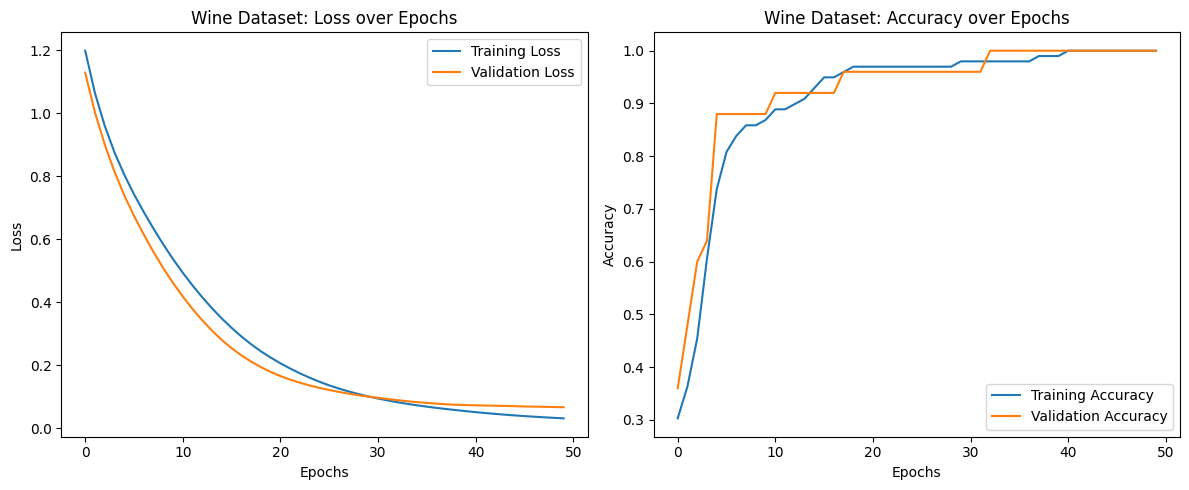

In [ ]:
# Train the model
wine_history = wine_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=1
)

# Visualize training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(wine_history.history['loss'], label='Training Loss')
plt.plot(wine_history.history['val_loss'], label='Validation Loss')
plt.title('Wine Dataset: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(wine_history.history['accuracy'], label='Training Accuracy')
plt.plot(wine_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wine Dataset: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **Step 4: Evaluate the Neural Network for Wine Dataset**
Evaluate the model on the test data and visualize the confusion matrix.

Wine Dataset - Test Loss: 0.0903, Test Accuracy: 0.9630
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Wine Dataset - Classification Report:
              precision    recall  f1-score   support

     class_0       0.90      1.00      0.95        19
     class_1       1.00      0.95      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



<Figure size 800x600 with 0 Axes>

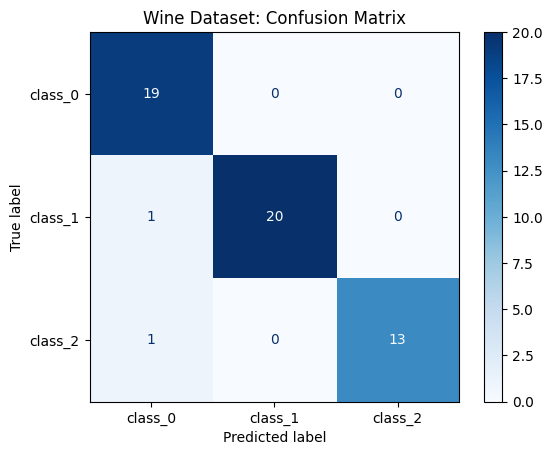

In [ ]:
# Evaluate the model
test_loss, test_accuracy = wine_model.evaluate(X_test, y_test, verbose=0)
print(f"Wine Dataset - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = wine_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Wine Dataset - Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Wine Dataset: Confusion Matrix")
plt.show()

# **Part 2: Performance Analysis**

### **Learning Characteristics**

* More complex dataset with higher feature dimensionality.
* Training and validation *curves* showed more variability.
* Slower convergence compared to the Iris dataset.
* Potential indicators of increased dataset complexity.


### **Performance Metrics**

* Classification report reveals nuanced performance across different classes.
* Confusion matrix highlights potential misclassification patterns.
* Accuracy might vary more significantly between classes.

## **Conclusion**
Our experiments demonstrated that neural network performance is highly contextual. While adding complexity can potentially improve model capabilities, it's crucial to:

* Understand the specific dataset.
* Empirically validate architectural changes.
* Maintain a balance between model complexity and generalization.

The key takeaway is that there's no one-size-fits-all approach. Continuous experimentation, validation, and domain-specific insights are essential for developing effective machine learning models.